# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Получаем общую информацию о данных

In [4]:
display(data.head(), data.tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Изучаем первые и последние 5 строк датафрейма

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Смотрим распределение данных в каждом столбце

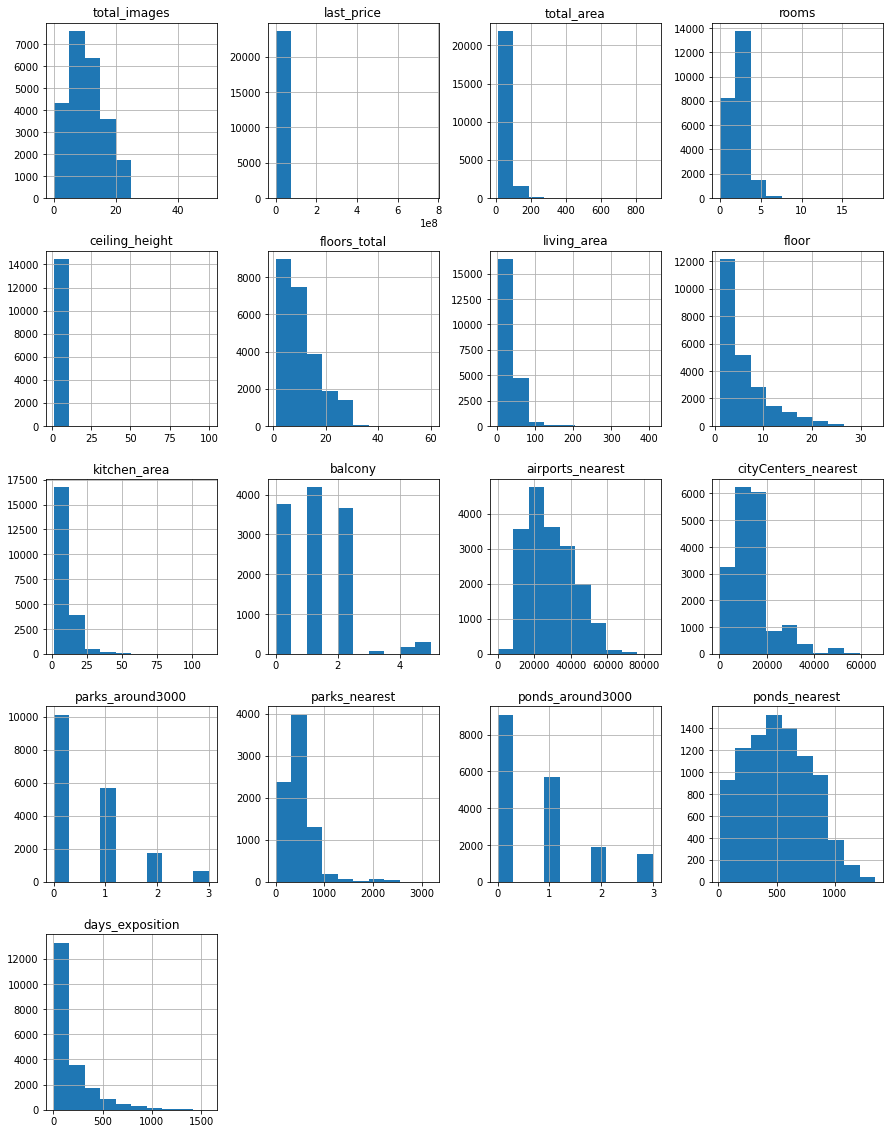

In [6]:
import matplotlib.pyplot as plt
data.hist(figsize=(15, 20))
plt.show()

Построим гистограммы по каждому столбцу

Вывод: После произведенных манипуляций стало ясно, что основная работа уйдет на обработку пропущенных значений, а также найти и устранить аномальные.

### Выполните предобработку данных

In [7]:
data.duplicated().sum()

0

Ищем количество дубликатов

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Считаем пропущенные значения

Достаточно большое количество пропущенных значений, в последствии будем решать этот вопрос

In [9]:
data.query('ceiling_height > 2 and ceiling_height < 8')['ceiling_height'].mean()

2.7273473480395545

Разберем столбец ceiling_height: здесь большое количество пропусков и неправдоподобных данных. Например, минимальное значение высоты потолка - 1 м. Считаем среднее из допустимых значений

In [10]:
# теперь можем присвоить это значение к невошедшим по предыдущему параметру данным
data.loc[data['ceiling_height'] < 2, ['ceiling_height']] = 2.73
data.loc[data['ceiling_height'] > 8, ['ceiling_height']] = 2.73
# проверим снова данный параметр
data.query('ceiling_height < 2 and ceiling_height > 8')['ceiling_height'].sum()

0.0

In [11]:
# после этого можем заполнить пропуски в столбце 
data['ceiling_height'] = data['ceiling_height'].fillna(2.73)
# проверим пропуски
data['ceiling_height'].isna().sum()

0

In [12]:
# Посчитаем значения is_apartment, которые не относятся к булевым
data.query('is_apartment != True or is_apartment != False')['is_apartment'].count()

2775

In [13]:
data['is_apartment'] = data['is_apartment'].fillna('False').astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски означают то, что в объявлении не был указан данный пункт, значит недвижимость не является апартаментом. Заменим эти значения на False

In [14]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Теперь можно заполнить пропуски в столбце kitchen_area. Скорее всего пропуски возникли в тех квартирах, где кухня совмещена с другой комнатой, поэтому заменим пропущенные значения на 0. Тоже самое проделаем и с балконами, если балконов нет, то их значение 0

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Исследуем уникальные значения в столбце с названием населенных пунктов

In [16]:
# приведем все значения к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].value_counts()

санкт-петербург            15721
посёлок мурино               522
посёлок шушары               440
всеволожск                   398
пушкин                       369
                           ...  
поселок цвылёво                1
деревня снегирёвка             1
поселок гаврилово              1
деревня терпилицы              1
поселок станции лужайка        1
Name: locality_name, Length: 364, dtype: int64

In [17]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'].value_counts()

санкт-петербург                               15721
посёлок мурино                                  556
посёлок шушары                                  440
всеволожск                                      398
пушкин                                          369
                                              ...  
посёлок ропша                                     1
посёлок рабитицы                                  1
посёлок при железнодорожной станции вещево        1
деревня шпаньково                                 1
деревня терпилицы                                 1
Name: locality_name, Length: 330, dtype: int64

Заменим е на ё. Это человеческий фактор.

In [18]:
data = data.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000',
    }
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изменим значения некоторых столбцов для единого вида

In [19]:
data['parks_around_3000'].unique()
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')
data['parks_around_3000'].isna().sum()

0

Проверим уникальные значения parks_around_3000, соответственно, если обнаружим пропуск, то парка в районе 3000м нет.

In [20]:
data['ponds_around_3000'].unique()
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype('int')
data['ponds_around_3000'].isna().sum()

0

Тоже самое проделаем и с прудами

In [21]:
# Изменим время на удобный для чтения вариант
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,25.0,0.0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,True,...,11.0,2.0,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.73,5.0,34.3,4,True,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.73,14.0,NaN,9,True,...,0.0,0.0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,41.0,0.0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [22]:
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [23]:
data['balcony'] = data['balcony'].astype('int')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Проверим еще раз общую информацию и обратим внимание на типы данных

Предобработка данных выполнена. Хочется отметить, что большинство значений было с пропусками, что влияет на конечный результат. Пропуски были устранены, но необходимо сообщить ответственным людям, что присутствуют недостатки в данных.

### Добавьте в таблицу новые столбцы

In [25]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].round(2)
display(data['price_per_square_meter'])

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_per_square_meter, Length: 23699, dtype: float64

Добавляю столбец "Цена за один квадратный метр" и округляю до двух знаков после запятой

In [26]:
data['day_of_week_publication'] = data['first_day_exposition'].dt.weekday
data['month_of_publication'] = data['first_day_exposition'].dt.month
data['year_of_publication'] = data['first_day_exposition'].dt.year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_publication,month_of_publication,year_of_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,True,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.73,5.0,34.3,4,True,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.73,14.0,NaN,9,True,...,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


Добавляю столбец с обозначением дня недели, месяца, года публикации

In [27]:
last_f = data.query('floors_total / floor == 1')
data['type_floor'] = data['floor']
data.loc[data['type_floor'] == 1, 'type_floor'] = 'первый'
data.loc[last_f.index, 'type_floor'] = 'последний'
data.loc[(data['type_floor'] != 'первый') & (data['type_floor'] != 'последний'), 'type_floor'] = 'другой'
data['type_floor'].astype('str')
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_publication,month_of_publication,year_of_publication,type_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.73,11.0,18.60,1,True,...,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.73,5.0,34.30,4,True,...,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.73,14.0,NaN,9,True,...,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.73,12.0,14.40,5,True,...,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.73,26.0,10.60,6,True,...,0,NaN,0,NaN,155.0,99195.71,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.73,24.0,NaN,22,True,...,0,NaN,0,NaN,NaN,110544.69,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.73,27.0,15.43,26,True,...,0,NaN,0,NaN,189.0,87454.76,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,0,NaN,0,NaN,289.0,88524.59,6,2,2017,другой


Добавляем столбец с типом этажа квартиры

In [28]:
data['distance_to_the_center'] = (data['city_centers_nearest'] / 1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_publication,month_of_publication,year_of_publication,type_floor,distance_to_the_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,True,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.73,5.0,34.3,4,True,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.73,14.0,NaN,9,True,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


Добавляю столбец с расстоянием до центра

### Проведите исследовательский анализ данных

<AxesSubplot:>

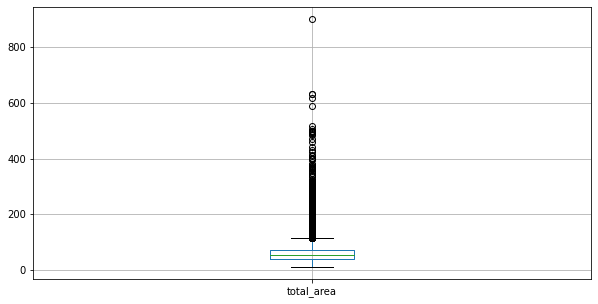

In [29]:
data['total_area'].describe()
data.boxplot(column=['total_area'], figsize=(10,5), grid=True)

Изучаем параметр "Общая площадь". Исходя из описания данных большие значения будут отрицательно влиять на статистику, поэтому отсечем квартиры, с большой площадью и оставим среднестатистическое жилье площадью до 100 кв.м.

<AxesSubplot:>

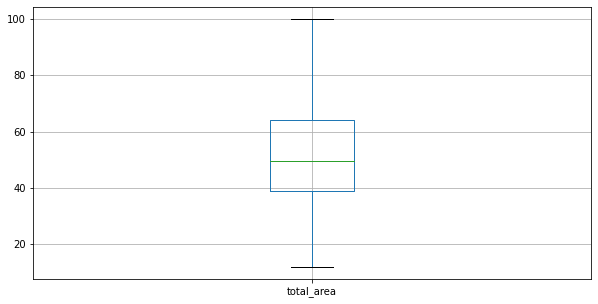

In [30]:
good_data = data.query('total_area < 100')
good_data.boxplot(column=['total_area'], figsize=(10, 5), grid=True)

Данная диаграмма размаха показывает, что выбросов, искажающих статистику нет

Text(0.5, 0, 'Площадь квартиры')

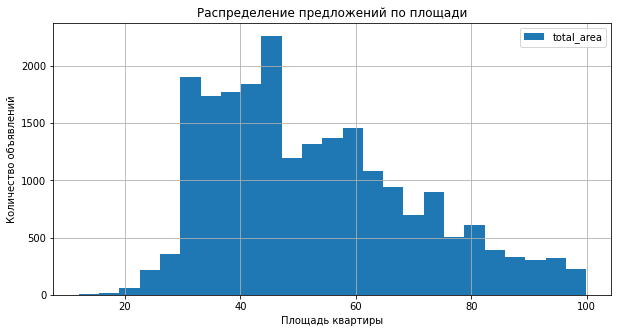

In [31]:
good_data.plot(kind='hist', y='total_area', grid=True, bins=25, figsize=(10, 5), title='Распределение предложений по площади')
plt.ylabel('Количество объявлений')
plt.xlabel('Площадь квартиры')

<AxesSubplot:>

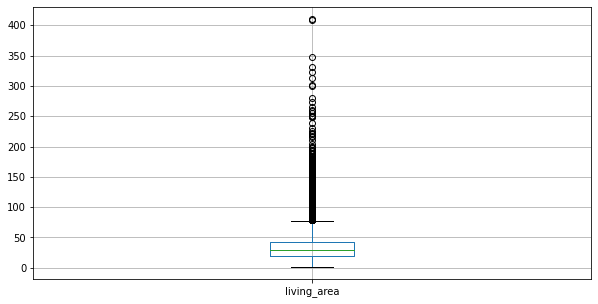

In [32]:
data.boxplot(column=['living_area'], grid=True, figsize=(10, 5))

Построим диаграмму размаха жилой площади. Отчетливо видны выбросы

<AxesSubplot:>

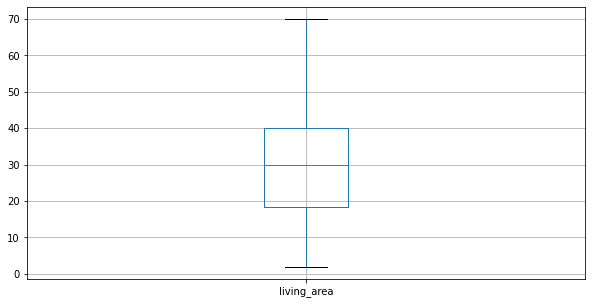

In [33]:
good_data = data.query('living_area < 70')
good_data.boxplot(column=['living_area'], grid=True, figsize=(10, 5))

Также видим достаточно большое количество выбросов, избавимся от них. Скорректированные значения позволят сделать более точный вывод

Text(0.5, 0, 'Жилая площадь квартиры')

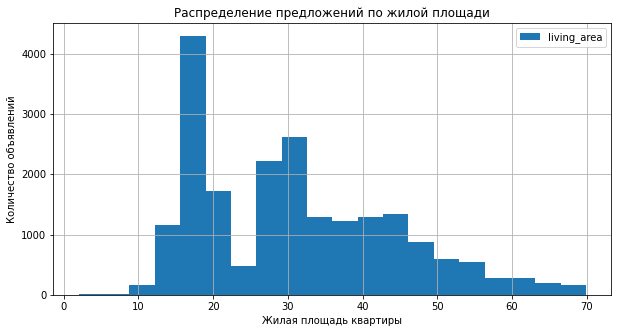

In [34]:
good_data.plot(kind='hist', y='living_area', grid=True, bins=20, figsize=(10, 5), title='Распределение предложений по жилой площади')
plt.ylabel('Количество объявлений')
plt.xlabel('Жилая площадь квартиры')

Построим гистограмму жилой площади

<AxesSubplot:>

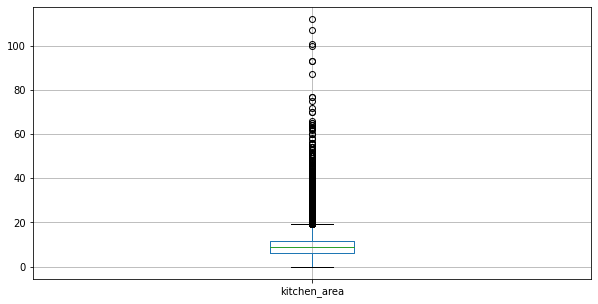

In [35]:
data.boxplot(column='kitchen_area', grid=True, figsize=(10, 5))

Также видны выбросы, удалим их

<AxesSubplot:>

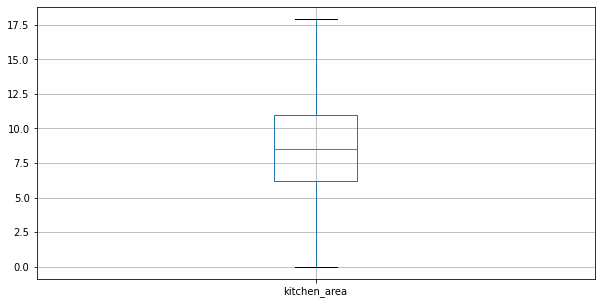

In [36]:
good_data = data.query('kitchen_area < 18')
good_data.boxplot(column='kitchen_area', grid=True, figsize=(10, 5))

Ненужные данные аннулированы

Text(0.5, 0, 'Площадь кухни')

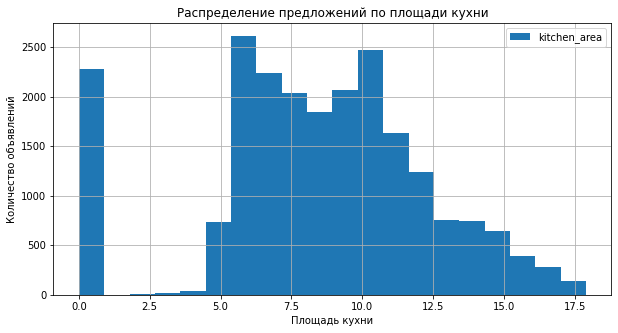

In [37]:
good_data.plot(kind='hist', y='kitchen_area', grid=True, bins=20, figsize=(10, 5), title='Распределение предложений по площади кухни')
plt.ylabel('Количество объявлений')
plt.xlabel('Площадь кухни')

По гистограмме достаточно большое значение возле нуля - множество квартир с кухней, которая совмещена с другими комнатами.

<AxesSubplot:>

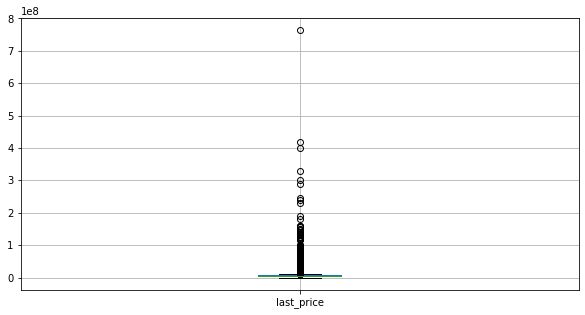

In [38]:
data.boxplot(column='last_price', grid=True, figsize=(10, 5))

Очень много данных, которые негативно влияют на дальнейший анализ

<AxesSubplot:>

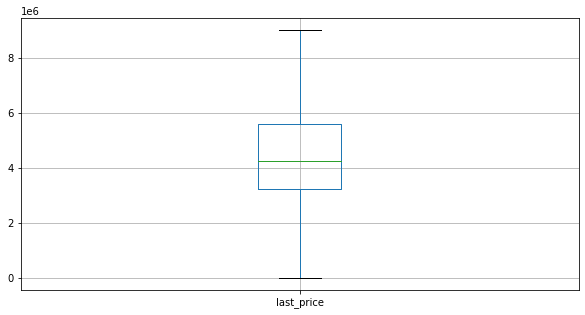

In [39]:
good_data = data.query('last_price < 9000000')
good_data.boxplot(column='last_price', grid=True, figsize=(10, 5))

Корректируем данные для более точного результата. Выбросы удалены

Text(0.5, 0, 'Цена')

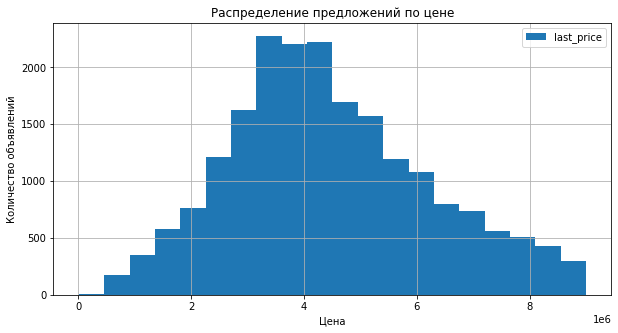

In [40]:
good_data.plot(kind='hist', y='last_price', grid=True, bins=20, figsize=(10, 5), title='Распределение предложений по цене')
plt.ylabel('Количество объявлений')
plt.xlabel('Цена')

По гистограмме видно, что в основном квартиры продают по цене 3-4 млн руб

<AxesSubplot:>

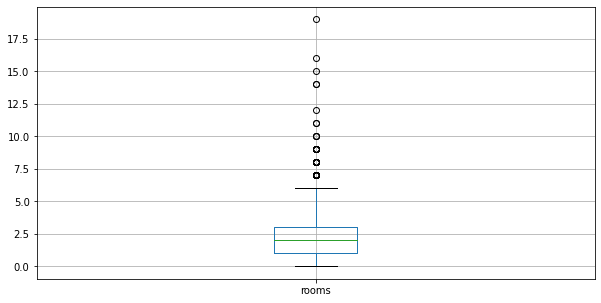

In [41]:
data.boxplot(column='rooms', grid=True, figsize=(10, 5))

По данной диаграмме размаха можно сказать, что выбросов не так много, потому что квартиры с большим количеством комант - редкость. Однако, также скорректируем данные, как это делали в предыдущий раз

<AxesSubplot:>

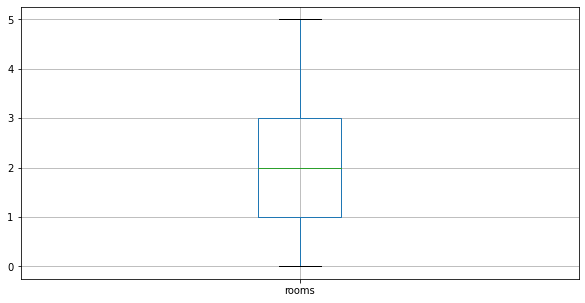

In [42]:
good_data = data.query('rooms < 6')
good_data.boxplot(column='rooms', grid=True, figsize=(10, 5))

Text(0.5, 0, 'Количество комнат')

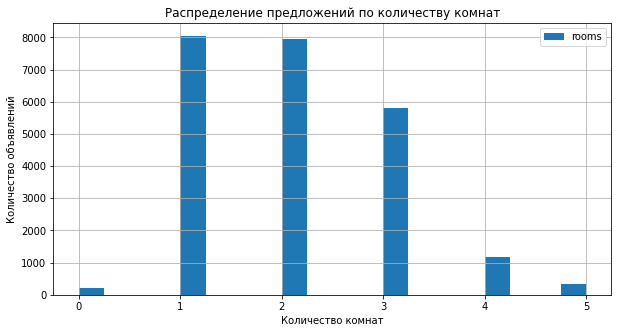

In [43]:
good_data.plot(kind='hist', y='rooms', grid=True, bins=20, figsize=(10, 5), title='Распределение предложений по количеству комнат')
plt.ylabel('Количество объявлений')
plt.xlabel('Количество комнат')

Построим гистограмму для наглядности. Большинство квартир имеют 1 или 2 комнаты. Также имеется достаточный объем предложения 3-х комнтаных квартир. 4-х и 5-х комнатных квартир в разы меньше.

<AxesSubplot:>

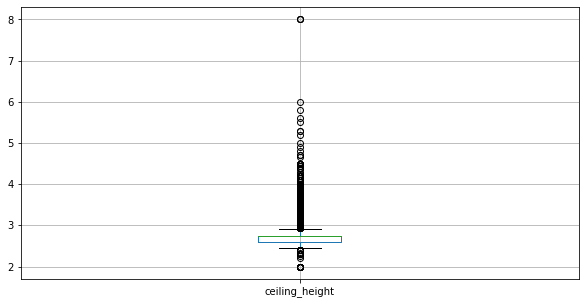

In [44]:
# построим диаграмму размаха по высоте потолков
data.boxplot(column='ceiling_height', grid=True, figsize=(10, 5))

Необходимо отсечь высоту потолков от 2.4 метра до 2.9 метра

<AxesSubplot:>

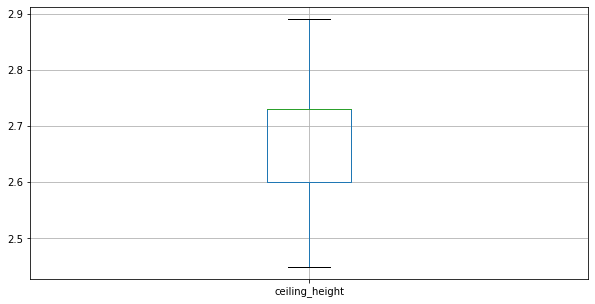

In [45]:
good_data = data.query('2.4 < ceiling_height < 2.9')
good_data.boxplot(column='ceiling_height', grid=True, figsize=(10, 5))

Text(0.5, 0, 'Высота потолков')

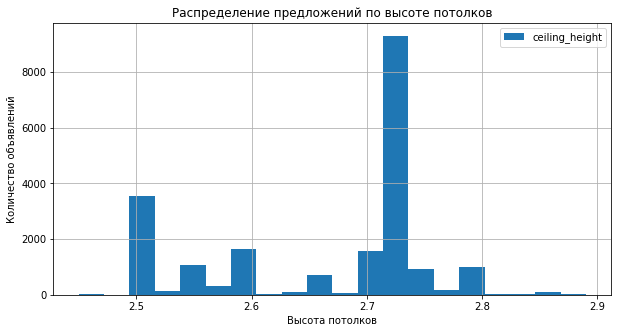

In [46]:
good_data.plot(kind='hist', y='ceiling_height', grid=True, bins=20, figsize=(10, 5), title='Распределение предложений по высоте потолков')
plt.ylabel('Количество объявлений')
plt.xlabel('Высота потолков')

В основном квартиры на рынке с высотой потолка около 2.75 метров, но также присутствует достаточное количество предложений с высотой 2.5 метра.

<AxesSubplot:title={'center':'График количественного отношения распределения предложений в зависимости от этажа'}>

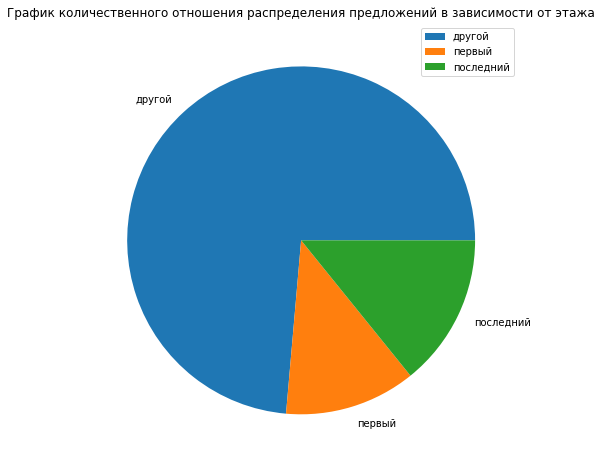

In [47]:
data.pivot_table(index='type_floor', values='last_price', aggfunc='count').plot.pie(y='last_price', figsize=(8, 8), label='', title='График количественного отношения распределения предложений в зависимости от этажа')

Можем сделать вывод, что преобладают квартиры, расположенные не на первом и не на последнем этаже.

<AxesSubplot:>

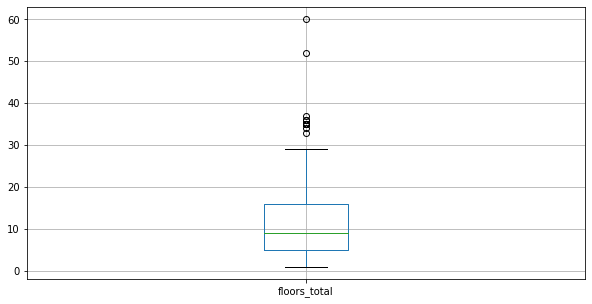

In [48]:
# построим диаграмму размаха по общему количеству этажей в доме
data.boxplot(column='floors_total', grid=True, figsize=(10, 5))

Здесь также можем наблюдать, что выбросов не так уж и много, как и небоскребов в Санкт-Петербурге. Отсечем эти данные

Text(0.5, 0, 'Этажность дома')

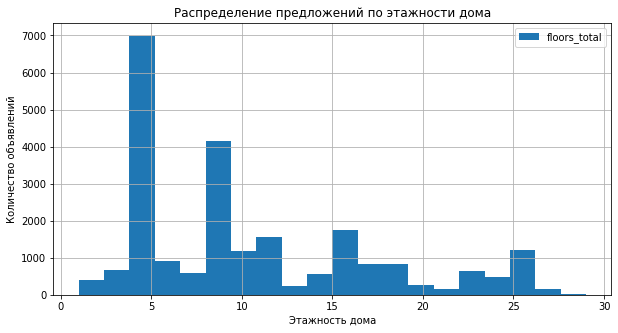

In [49]:
good_data = data.query('floors_total < 30')
# построим гистограмму
good_data.plot(kind='hist', y='floors_total', grid=True, bins=20, figsize=(10, 5), title='Распределение предложений по этажности дома')
plt.ylabel('Количество объявлений')
plt.xlabel('Этажность дома')

Видим, что преобладают дома менее 5 этажей, однако, присутствуют и высотки - новостройки, их в разы меньше.

<AxesSubplot:>

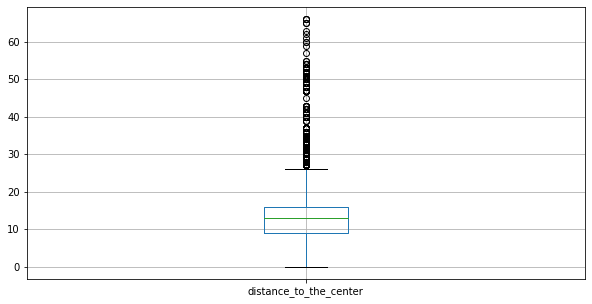

In [50]:
data.boxplot(column='distance_to_the_center', grid=True, figsize=(10, 5))

Видим большое значение выбросов - квартир, находящихся в пригороде. Также отсечем эти значения.

Text(0.5, 0, 'Расстояние от центра')

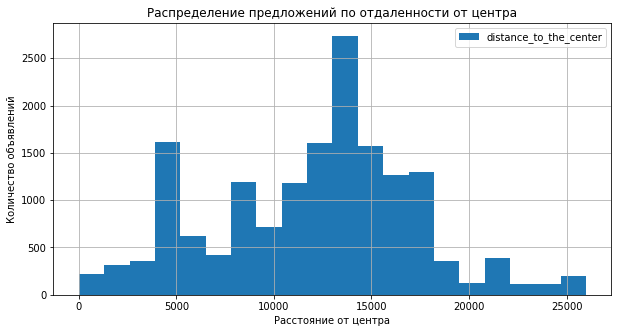

In [51]:
# умножим на 1000, так как необходимо расстояние в метрах
data['distance_to_the_center'] = data['distance_to_the_center'] * 1000
good_data = data.query('distance_to_the_center < 27000')
good_data.plot(kind='hist', y='distance_to_the_center', grid=True, bins=20, figsize=(10, 5), title='Распределение предложений по отдаленности от центра')
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние от центра')

По построенной гистограмме видно, что большинство продаваемых квартир расположены примерно в 13 километрах от центра города. При этом, не малую долю занимают квартиры, находящиеся на удалении около 5-и километров от центра.

<AxesSubplot:>

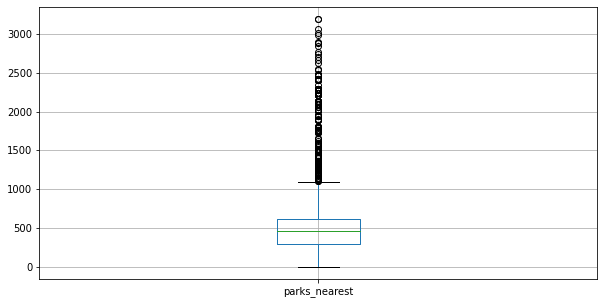

In [52]:
data.boxplot(column='parks_nearest', grid=True, figsize=(10, 5))

Видим большой выброс данных после 1100 метров, это необходимо устранить.

Text(0.5, 0, 'Расстояние до ближайшего парка')

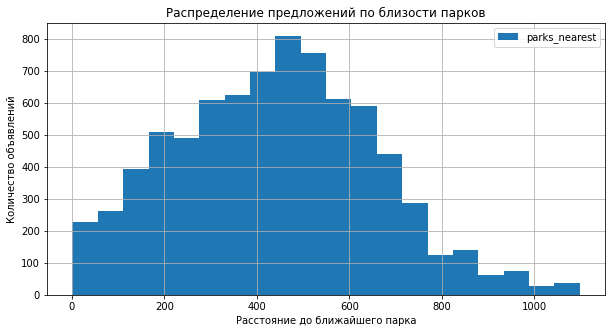

In [53]:
good_data = data.query('parks_nearest < 1100')
good_data.plot(kind='hist', y='parks_nearest', grid=True, bins=20, figsize=(10, 5), title='Распределение предложений по близости парков')
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние до ближайшего парка')

Можно отметить, что по скорректированным данным большую часть занимают квартиры с шаговой доступностью к парку.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Тут согласен

Text(0.5, 0, 'Количество дней')

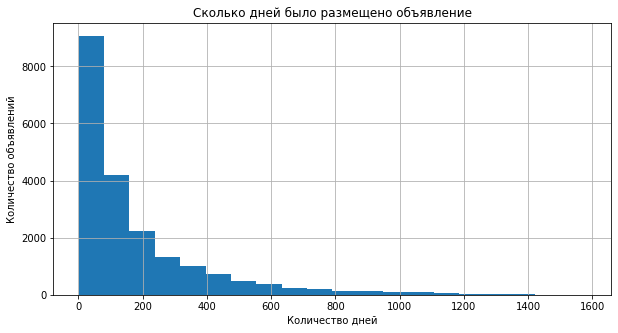

In [54]:
data['days_exposition'].plot(kind='hist', bins=20, grid=True, figsize=(10, 5), title='Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.xlabel('Количество дней')

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

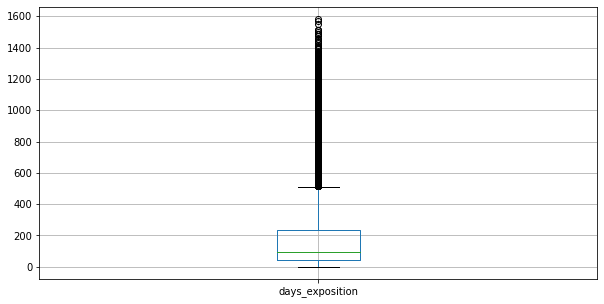

In [55]:
data.boxplot(column='days_exposition', grid=True, figsize=(10, 5))
data['days_exposition'].describe()

По диаграмме размаха видны выбросы, удалим их и рассмотрим гистограмму для наглядности.

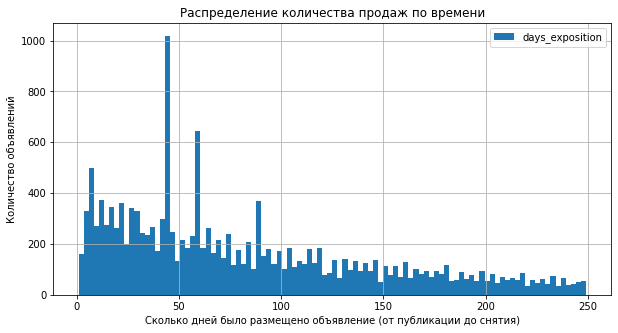

In [56]:
good_data = data.query('days_exposition < 250')
good_data.plot(kind='hist', y='days_exposition', title='Распределение количества продаж по времени', bins=100, figsize=(10,5), grid=True)
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

По данной гистограмме и по описанию данных выше можно сказать, что в среднем квартиры продаются за 2-3 месяца. До двух месяцев продажа считаеся быстрой, свыше уже можно считать долгой: возможно, из-за нестандартной планировки, местоположению и т.д.

Text(0, 0.5, 'Общая площадь')

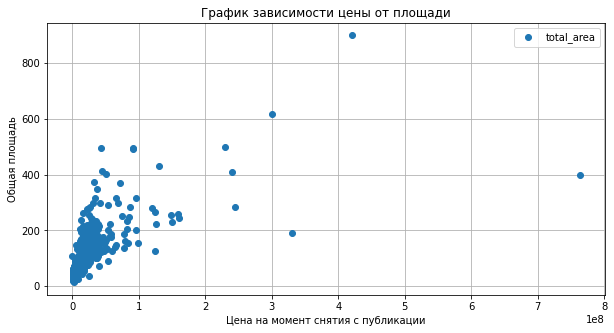

In [57]:
(good_data
     .pivot_table(index='last_price', values=['total_area'])
     .plot(grid=True, figsize=(10, 5), style='o', title='График зависимости цены от площади')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Общая площадь')

In [58]:
good_data['last_price'].corr(good_data['total_area'])

0.611304734596691

Text(0, 0.5, 'Жилая площадь')

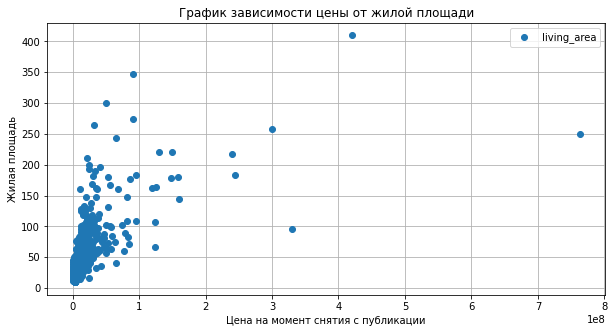

In [59]:
(good_data
     .pivot_table(index='last_price', values=['living_area'])
     .plot(grid=True, figsize=(10, 5), style='o', title='График зависимости цены от жилой площади')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Жилая площадь')

In [60]:
good_data['last_price'].corr(good_data['living_area'])

0.5291683297198613

Text(0, 0.5, 'Площадь кухни')

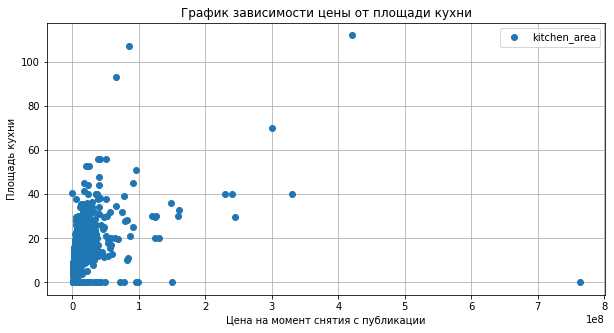

In [61]:
(good_data
     .pivot_table(index='last_price', values=['kitchen_area'])
     .plot(grid=True, figsize=(10, 5), style='o', title='График зависимости цены от площади кухни')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Площадь кухни')

In [62]:
good_data['last_price'].corr(good_data['kitchen_area'])

0.33754935600855107

Построив графики и изучив данные по корреляции, можно сделать вывод, что зависимость присутствует. Больше всего зависимость цены прослеживается от общей площади - что логично, ведь чем больше площадь, тем выше цена. Жилая площадь также оказывает достаточное влияние на цену. Меньше всего влияет на цену площадь кухни.

<AxesSubplot:xlabel='rooms'>

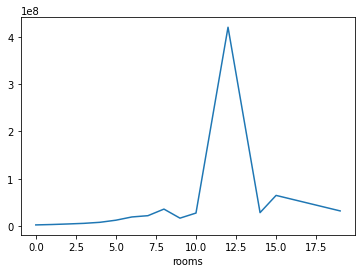

In [79]:
good_data.groupby('rooms')['last_price'].median().plot()

Text(0, 0.5, 'Цена')

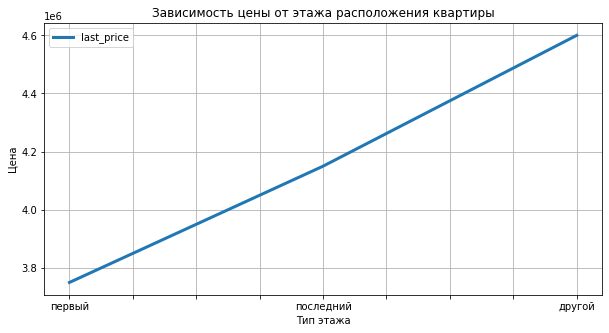

In [63]:
(good_data
     .pivot_table(index='type_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(10, 5), linewidth=3, title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Тип этажа')
plt.ylabel('Цена')

По графику видно, что цена растет пропорционально этажу, однако, квартиры на последнем этаже, стоят дешевле, чем на другом, кроме последнего. Меньше всего квартиры стоят на первых этажах

Text(0, 0.5, 'Цена')

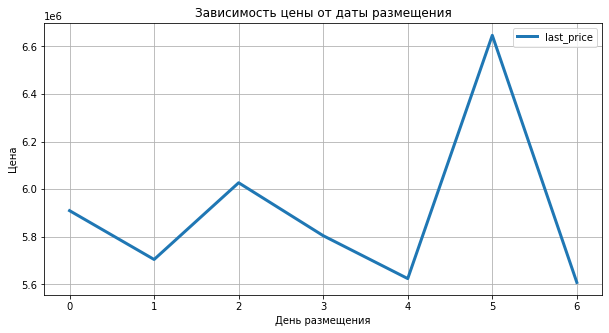

In [64]:
(good_data
     .pivot_table(index='day_of_week_publication', values=['last_price'])
     .plot(grid=True, figsize=(10, 5), linewidth=3, title='Зависимость цены от даты размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

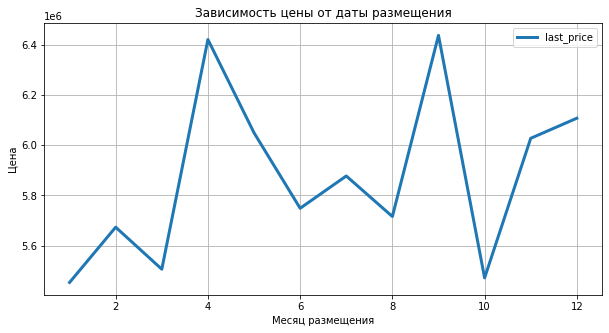

In [65]:
(good_data
     .pivot_table(index='month_of_publication', values=['last_price'])
     .plot(grid=True, figsize=(10, 5), linewidth=3, title='Зависимость цены от даты размещения')
)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

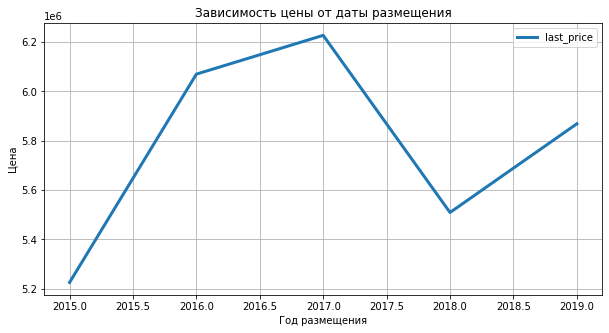

In [66]:
(good_data
     .pivot_table(index='year_of_publication', values=['last_price'])
     .plot(grid=True, figsize=(10, 5), linewidth=3, title='Зависимость цены от даты размещения')
)
plt.xlabel('Год размещения')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

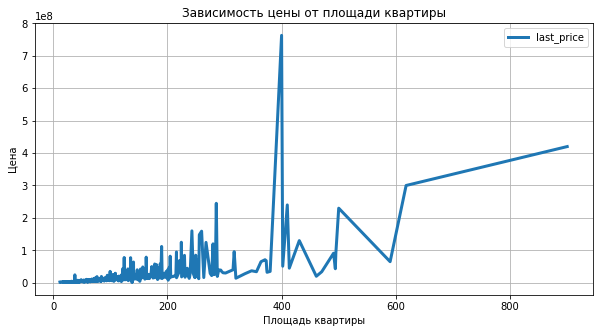

In [67]:
(good_data
     .pivot_table(index='total_area', values=['last_price'])
     .plot(grid=True, figsize=(10, 5), linewidth=3, title='Зависимость цены от площади квартиры')
)
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена')

По графикам можно сказать, что квартиры размещенные до пятницы, стоят дороже, чем в другие дни. По месячному графику видно, что квартиры стоят дешевле в середине и в конце года. Годовой график выглядит интереснее: с 2014 года тенденция отрицательная. Оценив динамику цены и площади продаваемых квартир видно, что очень много объектов с маленькой площадью, то есть цена снизилась из-за снижения площади продаваемых квартир.

In [68]:
# выявим топ-10 населенных пунктов по количеству объявлений
data_rating_10 = data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition', ascending=False)
data_rating_10.columns = ['number_of_advertisements']
# и добавим столбец "mean_price_per_sq_m" и посчитаем среднюю цену одного квадратного метра
data_rating_10['mean_price_per_sq_m'] = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean')
data_rating_10['mean_price_per_sq_m'] = data_rating_10['mean_price_per_sq_m'].round(2)
display(data_rating_10.head(10))

,number_of_advertisements,mean_price_per_sq_m
locality_name,,
санкт-петербург,15721,114849.01
посёлок мурино,556,85681.76
посёлок шушары,440,78677.36
всеволожск,398,68654.47
пушкин,369,103125.82
колпино,338,75424.58
посёлок парголово,327,90175.91
гатчина,307,68746.15
деревня кудрово,299,92473.55


In [69]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
санкт-петербург,15721,5500000.0
посёлок мурино,556,3400000.0
посёлок шушары,440,3950000.0
всеволожск,398,3450000.0
пушкин,369,5180000.0
колпино,338,3600000.0
посёлок парголово,327,4100000.0
гатчина,307,3100000.0
деревня кудрово,299,3790000.0


Санкт-петербург - город с самой высокой стоимостью за квардратный метр. А Выборг имеет наименьшую стоимоть из нашего Топ-10.

In [70]:
data_saint_p = data.query('locality_name == "санкт-петербург"')

In [71]:
mean_cost_per_km = (data_saint_p['last_price'].sum() / (data_saint_p['distance_to_the_center'] / 1000).sum()).round(2)
print('Средняя цена для каждого километра составляет:', mean_cost_per_km, 'руб')

Средняя цена для каждого километра составляет: 697989.33 руб


/tmp/ipykernel_735/2531891921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_saint_p['distance_to_the_center'] = data_saint_p['distance_to_the_center'] / 1000


Text(0, 0.5, 'Средняя стоимость предложения')

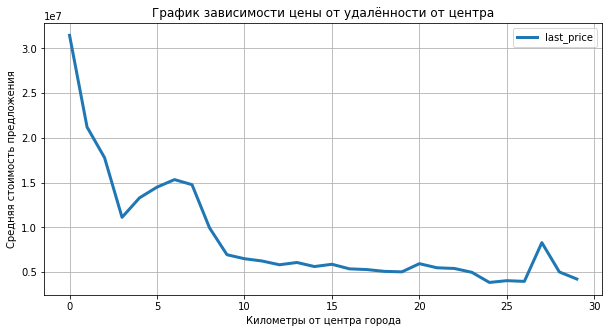

In [72]:
data_saint_p['distance_to_the_center'] = data_saint_p['distance_to_the_center'] / 1000
data_saint_p.pivot_table(index='distance_to_the_center', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')

По графику видно, что чем дальше чем дальше от центра, тем ниже стоимость квартиры. 

### Напишите общий вывод

    По результатам проделанной работы можно отметить, что в данных было достаточно большое количество пропущенных значений, которые были устранены на этапе предобработки, но из-за этого снизилось качество статистики. Некоторые пропуски были заполнены средними значениями, а некоторые так и были оставлены. Несомненно рекомендую обратить внимание на качество данных, ответственно относится к сбору и выгрузке, чтобы в последствии избежать таких проблем.
    
    После избавления от ненужных и выбивающихся значений мы выполнили такие операции как подсчёт средней стоимости квадратного метра жилья, стоимость каждого километра удаления от центра, выделили сегмент квартир расположенных в центре и проанализировали их параметры, а так же вывели статистику по скорости продажи объявления с даты его размещения, факторы влияющие на это и проанализировали статистику продаж в зависимости от периода размещения объявления.
    
    Для наглядности и визуализации данных использовались графики, а именно гистограммы. Лидером по стоимости жилья, учитывая цену за квадратный метр, является Санкт-Петербург. Однако, цены в пригороде, области не сильно уступают городским. Спрос на недвижимость, начиная с 2014 года имеет отрицательную тенденцию, однако, наблюдается подъем после 2018 года. Также виден спрос людей на квартиры не на первом и не на последних этажах. 
    
    Если обобщать результаты анализа, то люди выбирают 1-2 комнатные квартиры в высотной новостройке по периметру города Санкт-Петребург, с средней стоимостью в 100 тысяч рублей за кв.м. и высотой потолков 2,75 метра. Таким образом можно сделать вывод о том, что количество таких домов и соответственно предложений будет расти в след за ценой в отличии от цен на жильё расположенного по центру исторического района города в невысоких домах из старого фонда.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.